In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
carac=pd.read_csv('caracteristiques-2018.csv',encoding='ISO-8859-1')
usager=pd.read_csv('usagers-2018.csv',encoding='ISO-8859-1')
lieu=pd.read_csv('lieux-2018.csv',encoding='ISO-8859-1')
vehic=pd.read_csv('vehicules-2018.csv',encoding='ISO-8859-1')

C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
result=pd.merge(carac, lieu, on='Num_Acc')
df=pd.merge(usager, result, on='Num_Acc')
df=df.drop(columns=['Num_Acc'])
df['grav']=((df['grav']==2) | (df['grav']==3))

In [58]:
df=df[['grav','lum','agg','int','atm','catr','circ','nbv','prof','plan','surf','infra','catu','sexe','an_nais','secu']]

In [59]:
df=df.dropna()

for c in df.columns:
    if c in ['lum','int','atm','circ','prof','plan','infra','catu','surf']:
        m=int(max(df[c]))
        for i in range(1,m+1):
            df[c+str(i)]=(df[c]==i)
        df=df.drop(columns=c)
    elif c in ['agg','sexe']:
        df[c]=(df[c]==2)
    elif c=='catr':
        for i in range(1,7):
            df[c+str(i)]=(df[c]==i)
        df=df.drop(columns=c)
    elif c=='an_nais':
        df['age']=(2018-df[c])/(2018-min(df[c]))
        df=df.drop(columns=c) 
    elif c=='secu':
        #df['secu1']=df['secu'].apply(lambda x:str(x)[0])
        #df['secu2']=df['secu'].apply(lambda x:str(x)[1])
        #df=df.drop(columns=c)
        df[c]=df[c].astype(int)
        df['secu1']=df[c].apply(lambda x:int(str(x)[-1])==1)
        df['secu2']=df[c].apply(lambda x:int(str(x)[-1])==2)
        df=df.drop(columns=c)

In [60]:
corr=df.corr().loc['grav']

In [61]:
importances=abs(corr).sort_values(ascending=False)
features=list(importances.index)[1:]

In [80]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3,random_state=42)

#undersampling
X_train_1=train.loc[train['grav']==1,features]
y_train_1=train.loc[train['grav']==1,'grav']
X_train_2=train.loc[train['grav']==0,features].head(n=len(X_train_1))
y_train_2=train.loc[train['grav']==0,'grav'].head(n=len(X_train_1))

X_train=pd.concat([X_train_1,X_train_2],axis=0)
y_train=pd.concat([y_train_1,y_train_2],axis=0)

X_test=test[features]
y_test=test['grav']

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()
#model=LogisticRegression(max_iter=300)
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [82]:
y_pred=model.predict(X_train)
print("Train accuracy : ",np.mean(y_pred==y_train))

y_pred=model.predict(X_test)
print("Test accuracy : ",np.mean(y_pred==y_test))

from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

Train accuracy :  0.6956547869463309
Test accuracy :  0.7100634487189784
(0.6288224336640217, 0.6862270939440835, 0.6330862137861681, None)


In [83]:
y_pred.mean()

0.3472545712526437

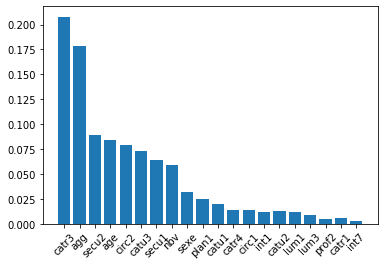

In [85]:
plt.bar(features,model.feature_importances_)
plt.xticks(rotation=45)
plt.show()

In [78]:
importances=pd.Series(model.feature_importances_,features)

In [79]:
features=list(importances.sort_values(ascending=False)[:20].index)

In [31]:
import tensorflow as tf
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(5, input_dim=len(features), activation='relu'))
model.add(Dense(3, input_dim=len(features), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [32]:
X=df[features]
y=df['grav']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
83419/83419 [==============================] - 1s 15us/step - loss: 0.4722 - accuracy: 0.7913
Epoch 2/100
83419/83419 [==============================] - ETA: 0s - loss: 0.4335 - accuracy: 0.81 - 1s 12us/step - loss: 0.4337 - accuracy: 0.8146
Epoch 3/100
83419/83419 [==============================] - ETA: 0s - loss: 0.4322 - accuracy: 0.81 - 1s 12us/step - loss: 0.4320 - accuracy: 0.8154
Epoch 4/100
83419/83419 [==============================] - 1s 12us/step - loss: 0.4312 - accuracy: 0.8158 0s - loss: 0.4295 - accura
Epoch 5/100
83419/83419 [==============================] - 1s 12us/step - loss: 0.4308 - accuracy: 0.8158
Epoch 6/100
83419/83419 [==============================] - 1s 12us/step - loss: 0.4306 - accuracy: 0.8158
Epoch 7/100
83419/83419 [==============================] - 1s 12us/step - loss: 0.4305 - accuracy: 0.8154 0s - loss: 0.4267 - accuracy: 0.81 - ETA: 0s
Epoch 8/100
83419/83419 [==============================] - 1s 12us/step - loss: 0.4302 - accuracy: 0.8

83419/83419 [==============================] - 1s 11us/step - loss: 0.4261 - accuracy: 0.8165 0s -
Epoch 72/100
83419/83419 [==============================] - 1s 11us/step - loss: 0.4260 - accuracy: 0.8169 0s -
Epoch 73/100
83419/83419 [==============================] - 1s 11us/step - loss: 0.4260 - accuracy: 0.8165 0s - loss: 0.4263 - accuracy
Epoch 74/100
83419/83419 [==============================] - 1s 11us/step - loss: 0.4259 - accuracy: 0.8164 
Epoch 75/100
83419/83419 [==============================] - 1s 11us/step - loss: 0.4260 - accuracy: 0.8166
Epoch 76/100
83419/83419 [==============================] - 1s 11us/step - loss: 0.4259 - accuracy: 0.8166 0s - loss: 0 - ETA: 0s - loss: 0.4255 - accuracy
Epoch 77/100
83419/83419 [==============================] - 1s 11us/step - loss: 0.4259 - accuracy: 0.8164
Epoch 78/100
83419/83419 [==============================] - 1s 12us/step - loss: 0.4260 - accuracy: 0.8167
Epoch 79/100
83419/83419 [==============================] - 1s 14us/

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.748


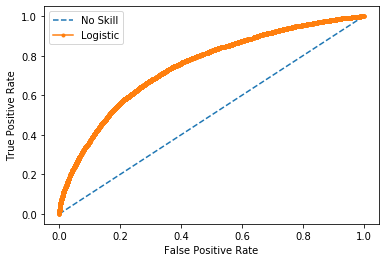

In [84]:
# roc curve and auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [86]:
model.predict_proba(X_test)

array([[0.83185342, 0.16814658],
       [0.64495611, 0.35504389],
       [0.56920552, 0.43079448],
       ...,
       [0.72568575, 0.27431425],
       [0.58327866, 0.41672134],
       [0.68580549, 0.31419451]])